<a href="https://colab.research.google.com/github/strange-hawk/ml_nn/blob/master/fashon_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

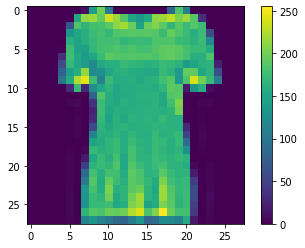

In [6]:
plt.figure()
plt.imshow(train_images[10]);
plt.colorbar()
plt.grid(False)


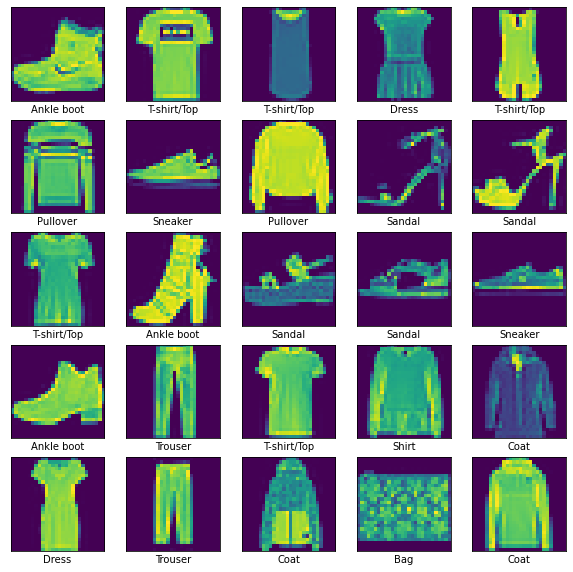

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10))


In [11]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4706 - accuracy: 0.8390
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4734 - accuracy: 0.8388
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8390
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4670 - accuracy: 0.8418
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4682 - accuracy: 0.8426
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4593 - accuracy: 0.8454
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4570 - accuracy: 0.8455
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4575 - accuracy: 0.8442
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4576 - accuracy: 0.8440
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.454

In [15]:
probability_model = keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [16]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.9182372e-04, 0.0000000e+00, 8.8529492e-04,
       2.6541152e-19, 9.9842286e-01], dtype=float32)

In [17]:
class_names[np.argmax(predictions[3])]

'Trouser'

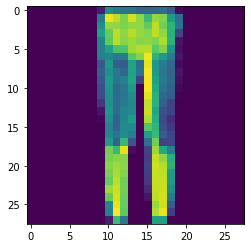

In [19]:
plt.imshow(test_images[3])

In [29]:
def plot_image(i,prediction_array,true_image,img):
  prediction_array,true_label,img = prediction_array,true_image[i],img[i]
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  predicted_label=np.argmax(prediction_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel(f'{class_names[predicted_label]} {round(100*np.max(prediction_array),2)}  true label : {class_names[true_label]}',color=color)


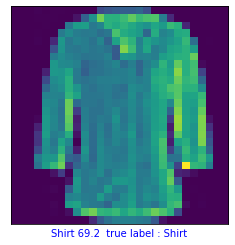

In [30]:
plot_image(4,predictions[4],test_labels,test_images)

In [43]:
def plot_value_array(i,prediction_array,true_labels):
  prediction_array,true_label = prediction_array,true_labels[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks(range(10),class_names,rotation=60)
  thisplot=plt.bar(range(10),prediction_array,color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



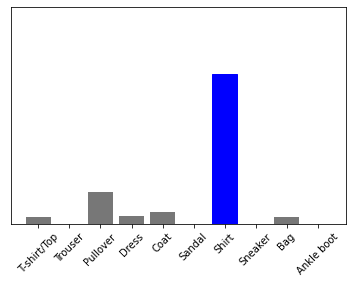

In [44]:
plot_value_array(4,predictions[4],test_labels)

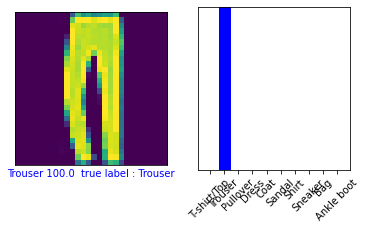

In [60]:
i=2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)

In [61]:
t=np.expand_dims(test_images[2],0)

In [62]:
class_names[int(model.predict_classes(t))]

'Trouser'

In [63]:
t.shape

(1, 28, 28)